`imports`, you've seen this before!

Research Question: What factors influence the size of Diameter Breast Height (DBH) of trees in Melbourne?

Why i want to research trees data in Melbourne?
-Because I've always loved nature since I was a kid, I don't know why every time I'm unhappy and go to a place with lots of trees and lawns I'll somehow be in a good mood and have the motivation to keep working hard. So I want to know more about trees.

Why I want to ask this qustion?
- I believe that the diameter of trees is influenced by many factors, such as geographical location, age description, latitude and longitude, family, and so on. I think that throughout the research process, many interesting things can be discovered.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas as gpd
import geopandas as gp
import shapely
import fiona


shp_file_name = "/Users/sylvia/Downloads/GDA2020/nsw_localities.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset/"
    "91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
    "5e295412-357c-49a2-98d5-6caf099c2339/download/"
    "nsw_locality_polygon_shp.zip"
)
if __name__ == "__main__":
    saved_style_state = plt.rcParams.copy()
    if os.path.isfile("../set9/trees-with-species-and-dimensions-urban-forest.csv"):
        filepath = "../set9/trees-with-species-and-dimensions-urban-forest.csv"
        print("Loading from file")
    else:
        filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
        print("Loading from the internet")



Loading from the internet


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [3]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to


Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [4]:
if os.path.isfile("trees-with-species-and-dimensions-urban-forest.csv"):
    filepath = "trees-with-species-and-dimensions-urban-forest.csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
    print("loading from the internet")

tdf = pd.read_csv(filepath)
print("done")

loading from file
done


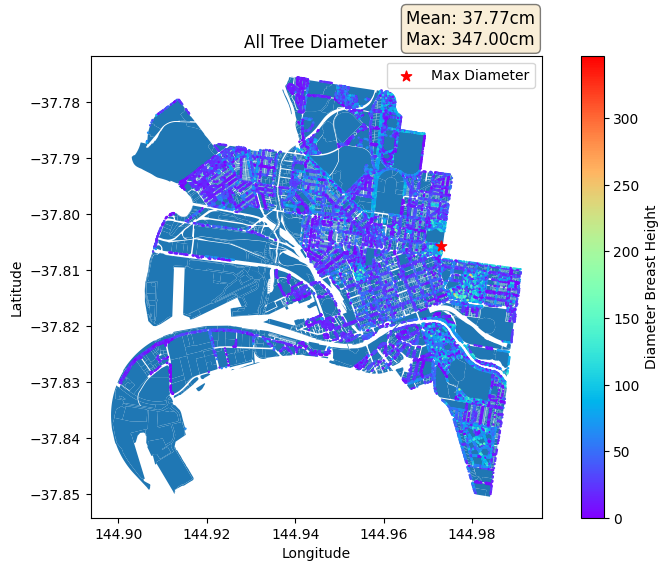

In [5]:
fig0 = plt.figure(figsize=(10, 6), num=1)
fig0_ax1 = fig0.add_subplot(111)
mel_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig0_ax1)
scatter = fig0_ax1.scatter(tdf["Longitude"], tdf["Latitude"],
                               c=tdf["Diameter Breast Height"],
                               cmap="rainbow", s=0.5)
tree_dia_mean = tdf["Diameter Breast Height"].mean()
tree_dia_max = tdf["Diameter Breast Height"].max()
street_max_items = tdf[tdf["Diameter Breast Height"] == tree_dia_max]
fig0_ax1.scatter(street_max_items["Longitude"], street_max_items["Latitude"],
                     c='red', marker="*", s=60, label="Max Diameter")
text_str = f'Mean: {tree_dia_mean:.2f}cm\nMax: {tree_dia_max:.2f}cm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig0_ax1.text(0.70, 1.1, text_str, transform=fig0_ax1.transAxes, fontsize=12,
                  verticalalignment='top', bbox=props)
fig0_ax1.set_title("All Tree Diameter")
fig0_ax1.set_xlabel("Longitude")
fig0_ax1.set_ylabel("Latitude")
fig0_ax1.legend()
cbar = plt.colorbar(scatter, ax=fig0_ax1)
cbar.set_label('Diameter Breast Height')
plt.show()

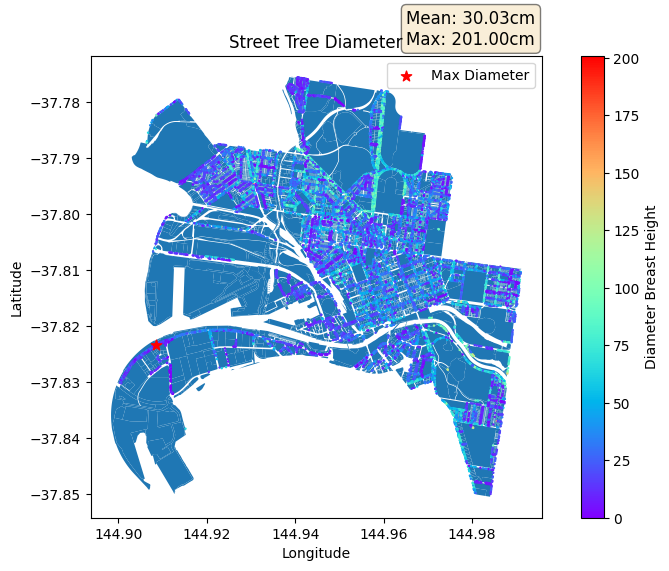

In [6]:
tdf_street = tdf.loc[(tdf["Located in"] == "Street")]
fig1 = plt.figure(figsize=(10, 6), num=2)
fig1_ax1 = fig1.add_subplot(111)
mel_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig1_ax1)
scatter = fig1_ax1.scatter(tdf_street["Longitude"], tdf_street["Latitude"],
                                c=tdf_street["Diameter Breast Height"],
                                cmap="rainbow", s=0.5)
street_tree_dia_mean = tdf_street["Diameter Breast Height"].mean()
street_tree_dia_max = tdf_street["Diameter Breast Height"].max()
street_max_items = tdf_street[(tdf_street["Diameter Breast Height"]) == street_tree_dia_max]
fig1_ax1.scatter(street_max_items["Longitude"], street_max_items["Latitude"], c='red', marker="*", s=60,
                    label="Max Diameter")
text_str = f'Mean: {street_tree_dia_mean:.2f}cm\nMax: {street_tree_dia_max:.2f}cm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig1_ax1.text(0.70, 1.1, text_str, transform=fig1_ax1.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
fig1_ax1.set_title("Street Tree Diameter")
fig1_ax1.set_ylabel("Latitude")
fig1_ax1.set_xlabel("Longitude")
fig1_ax1.legend()
cbar = plt.colorbar(scatter, ax=fig1_ax1)
cbar.set_label('Diameter Breast Height')
plt.show()

#Diameter Breast Height (DBH) Size Analysis of Street Trees.

In [7]:
tdf_street.loc[tdf_street["Diameter Breast Height"].idxmax()]

CoM ID                                                         1030802
Common Name                                            Peppercorn Tree
Scientific Name                                          Schinus molle
Genus                                                          Schinus
Family                                                   Anacardiaceae
Diameter Breast Height                                           201.0
Year Planted                                                      1997
Date Planted                                                12/12/1997
Age Description                                                 Mature
Useful Life Expectency                                     31-60 years
Useful Life Expectency Value                                      60.0
Precinct                                                           NaN
Located in                                                      Street
UploadDate                                                   1/10/2021
Coordi

Here is the fattest tree on street


<function matplotlib.pyplot.show(close=None, block=None)>

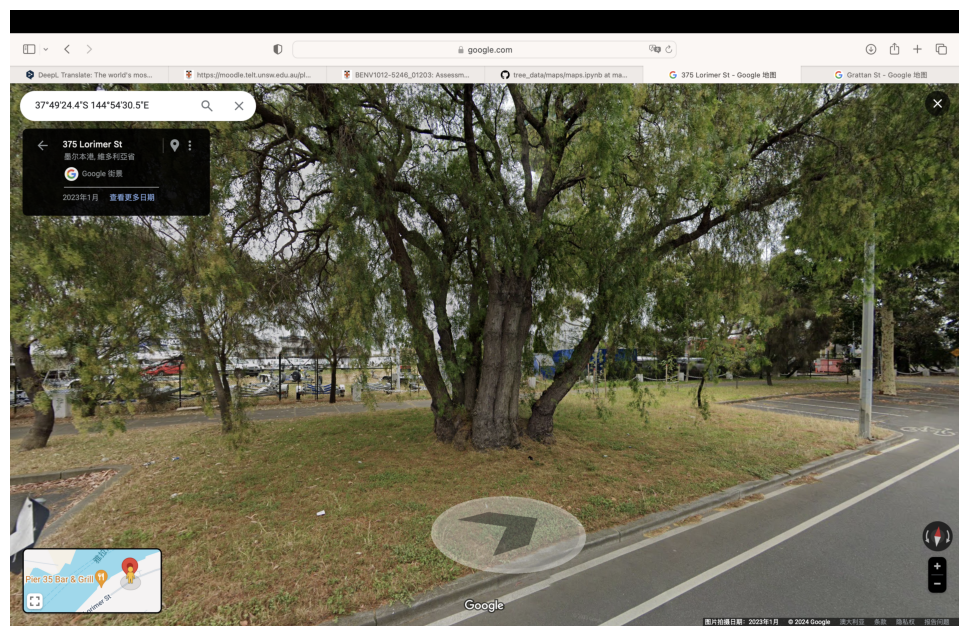

In [8]:
print("Here is the fattest tree on street")
img = mpimg.imread("street_tree.png")
plt. figure(figsize = (15,8))
plt. imshow(img)
plt. axis('off')
plt. show

I feel like this tree is so amazingly long, it looks like it's made up of many smaller trees. Or maybe the peppercorn tree itself is shaped like this, so I went to google and found that some of these trees are made up of many small trunks just like the picture, but there are also ones with only one trunk.

Then a continued search for more in-depth information on the peppercorn tree revealed that the tree in most cases sends out multiple trunks from the base, making the tree appear to be made up of multiple smaller trees. But there are also those that have only one trunk. Because of differences in environment and growing conditions, in open spaces Peppercorn Tree may develop multiple trunks to increase the size of the canopy. However, in more dense environments, or if they need to compete for sunlight and space, trees may tend to form a single thicker trunk to grow upwards. It is also related to age, with more trunks forming as they get older. Then I wanted to look at the age of the tree, and the average diameter at breast height for each age of the peppercorn. Tree in picture is 26 years old.

Age Group
0-10      21.000000
10-20     38.036145
20-30     61.941606
30-40           NaN
40-50           NaN
50-60           NaN
60-70           NaN
70-80           NaN
80-90           NaN
90-100          NaN
Name: Diameter Breast Height, dtype: float64


/var/folders/w_/h6lh6wr515z2ry3b9mdk_7sr0000gn/T/ipykernel_25126/3655200363.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peppercorn_tree_df['Age Group'] = pd.cut(peppercorn_tree_df['Age'], bins=bins, labels=labels)
/var/folders/w_/h6lh6wr515z2ry3b9mdk_7sr0000gn/T/ipykernel_25126/3655200363.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_mean_diameter = peppercorn_tree_df.groupby('Age Group')['Diameter Breast Height'].mean()


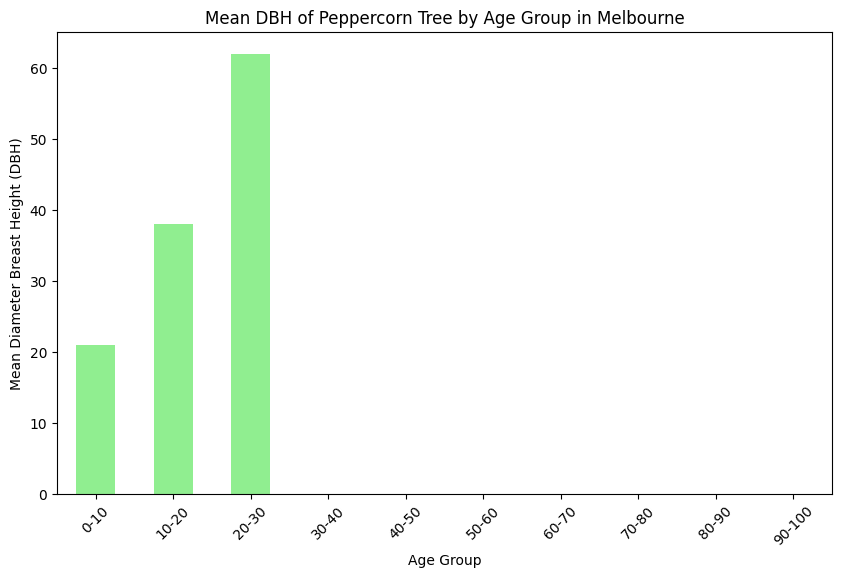

In [9]:
current_year = datetime.now().year
tdf['Age'] = current_year - tdf['Year Planted']
peppercorn_tree_df = tdf[tdf['Common Name'] == 'Peppercorn Tree']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

peppercorn_tree_df['Age Group'] = pd.cut(peppercorn_tree_df['Age'], bins=bins, labels=labels)
age_group_mean_diameter = peppercorn_tree_df.groupby('Age Group')['Diameter Breast Height'].mean()
print(age_group_mean_diameter)

plt.figure(figsize=(10, 6))
age_group_mean_diameter.plot(kind='bar', color='lightgreen')
plt.xlabel('Age Group')
plt.ylabel('Mean Diameter Breast Height (DBH)')
plt.title('Mean DBH of Peppercorn Tree by Age Group in Melbourne')
plt.xticks(rotation=45)
plt.show()

But I suddenly realised that only the year of planting does not infer the exact age of the tree, as the URL does not give the age of the tree at the time of planting. So I thought I could use the Age Description to get the information I wanted.

Age Description
Juvenile       12.222222
Mature         79.813333
New             2.285714
Over-mature    91.000000
Semi-Mature    30.921348
Name: Diameter Breast Height, dtype: float64


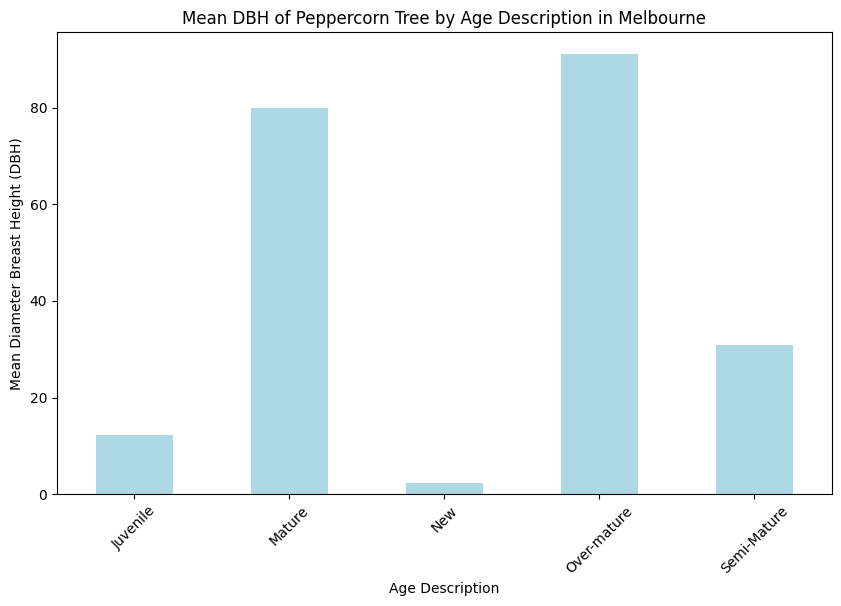

In [10]:
peppercorn_tree_df = tdf[tdf['Common Name'] == 'Peppercorn Tree']
age_desc_mean_diameter = peppercorn_tree_df.groupby('Age Description')['Diameter Breast Height'].mean()

print(age_desc_mean_diameter)

plt.figure(figsize=(10, 6))
age_desc_mean_diameter.plot(kind='bar', color='lightblue')
plt.xlabel('Age Description')
plt.ylabel('Mean Diameter Breast Height (DBH)')
plt.title('Mean DBH of Peppercorn Tree by Age Description in Melbourne')
plt.xticks(rotation=45)
plt.show()


From this bar graph I can see that the largest average diameter of peppercorns is at the over-mature age stage, but the largest diameter at breast height is at the mature, so I'm wondering if it's a distributional thing, where the fewer of the same kind there are, the more peppercorn trunks will have a larger diameter at breast height. So I mapped the distribution of peppercorn and labelled the Peppertree with the largest diameter.

14637


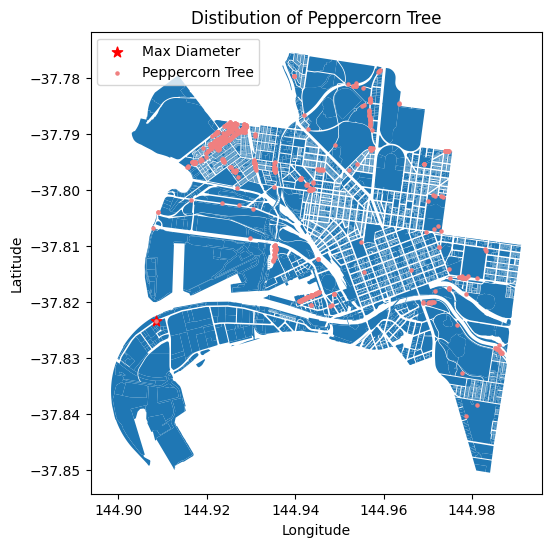

In [11]:
moreton_bay_fig_tdf = tdf[tdf['Common Name'] == 'Peppercorn Tree']
print(moreton_bay_fig_tdf.size)
fig15 = plt.figure(figsize=(10, 6), num=7)
fig15_ax1 = fig15. add_subplot(111)
el_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig15_ax1)
street_max_items = tdf_street[(tdf_street["Diameter Breast Height"]) == street_tree_dia_max]
fig15_ax1.scatter(street_max_items["Longitude"], street_max_items["Latitude"], c='red', marker="*", s=60,
                    label="Max Diameter")
fig15_ax1.scatter(moreton_bay_fig_tdf['Longitude'], moreton_bay_fig_tdf["Latitude"], c='lightcoral', s=5, label='Peppercorn Tree')
fig15_ax1.set_title('Distibution of Peppercorn Tree')
fig15_ax1.set_ylabel('Latitude')
fig15_ax1.set_xlabel('Longitude')
fig15_ax1.legend()
plt.show()

In the picture you can see that the largest diameter peppercorn tree has no similar species beyond 5 kilometres around it. But I thought that AGE DESCRIPTION is also a dependent variable, so I plotted a new graph to categorise AGE DESCRIPTION.

14637


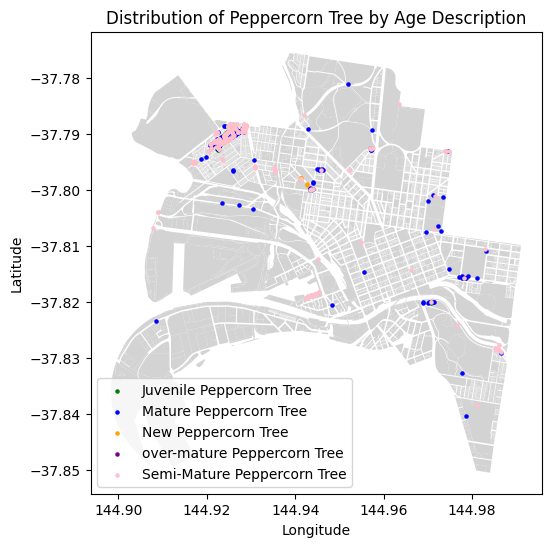

In [12]:
peppercorn_tree_df = tdf[tdf['Common Name'] == 'Peppercorn Tree']
print(peppercorn_tree_df.size)
fig16 = plt.figure(figsize=(10, 6), num=7)
fig16_ax1 = fig16.add_subplot(111)
mel_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
    mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig16_ax1, color='lightgrey')
age_desc_colors = {
    'Juvenile': 'green',
    'Mature': 'blue',
    'New': 'orange',
    'over-mature': 'purple',
    'Semi-Mature': 'pink'
    
}
for age_desc, color in age_desc_colors.items():
    subset = peppercorn_tree_df[peppercorn_tree_df['Age Description'] == age_desc]
    fig16_ax1.scatter(subset['Longitude'], subset['Latitude'], c=color, s=5, label=f'{age_desc} Peppercorn Tree')
street_max_items = tdf_street[(tdf_street["Diameter Breast Height"]) == street_tree_dia_max]
#fig16_ax1.scatter(street_max_items["Longitude"], street_max_items["Latitude"], c='red', marker="*", s=60, label="Max Diameter")
fig16_ax1.set_title('Distribution of Peppercorn Tree by Age Description')
fig16_ax1.set_ylabel('Latitude')
fig16_ax1.set_xlabel('Longitude')
fig16_ax1.legend()
plt.show()


I found this image with only the MATURE and SEMI-MATURE distribution maps and a NEW peppercorn tree. i went to the official website of the data to look for it and also only found that it only shows the MATURE and SEMI-MATURE distributions of the peppercorn tree. 

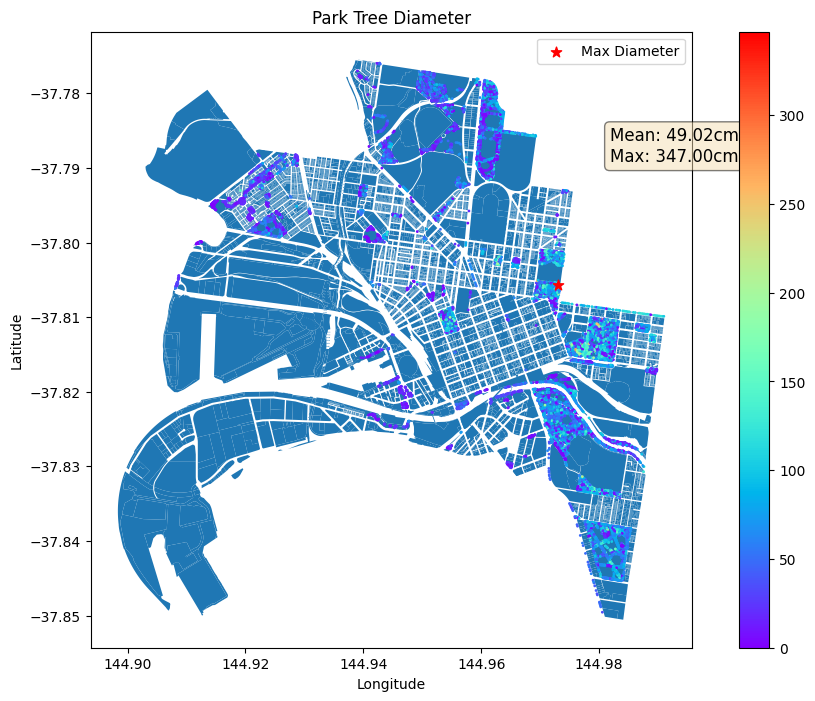

In [13]:
tdf_park = tdf.loc[(tdf["Located in"] == "Park")]
fig2 = plt.figure(figsize=(12, 8), num=3)
fig2_ax1 = fig2.add_subplot(111)
mel_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig2_ax1)
fig2_ax1_sc1 = fig2_ax1.scatter(tdf_park["Longitude"], tdf_park["Latitude"],
                                c=tdf_park["Diameter Breast Height"],
                                cmap="rainbow", s=1)
park_tree_dia_mean = tdf_park["Diameter Breast Height"].mean()
park_tree_dia_max = tdf_park["Diameter Breast Height"].max()
park_max_items = tdf_park[(tdf_park["Diameter Breast Height"]) == park_tree_dia_max]
fig2_ax1.scatter(park_max_items["Longitude"], park_max_items["Latitude"], c='red', marker="*", s=60,
                    label="Max Diameter")
text_str = f'Mean: {park_tree_dia_mean:.2f}cm\nMax: {park_tree_dia_max:.2f}cm'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig2_ax1.text(0.70, 1.1, text_str, transform=fig1_ax1.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
fig2_ax1.set_title("Park Tree Diameter")
fig2_ax1.set_ylabel("Latitude")
fig2_ax1.set_xlabel("Longitude")
fig2_ax1.legend()
fig2.colorbar(fig2_ax1_sc1, ax=fig2_ax1)
#Diameter Breast Height (DBH) Size Analysis of Park Trees.

Punt Road golden elm is Melbourne's most emailed tree


<function matplotlib.pyplot.show(close=None, block=None)>

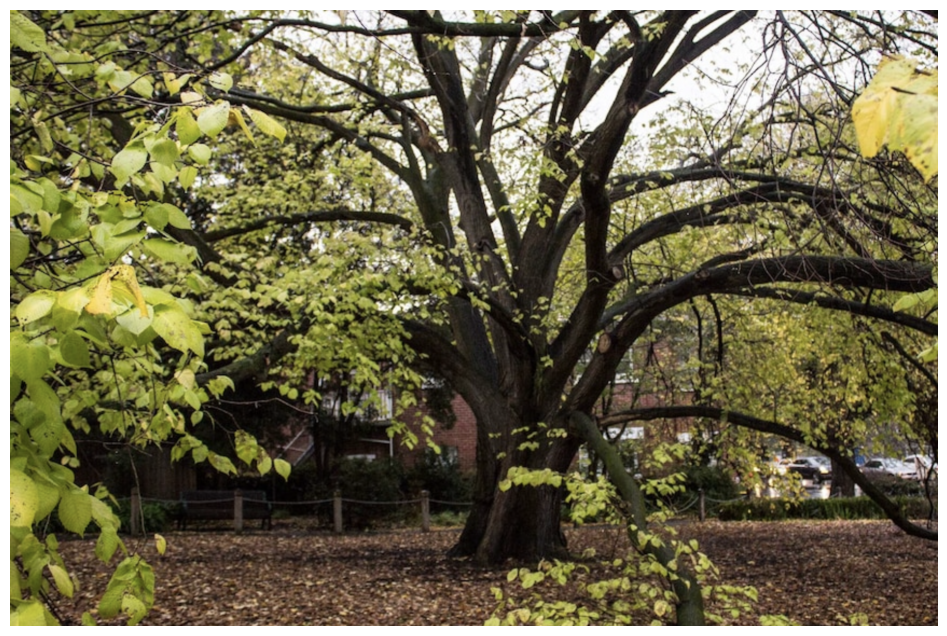

In [14]:
print("Punt Road golden elm is Melbourne's most emailed tree")
img = mpimg.imread("famous tree.png")
plt. figure(figsize = (15,8))
plt. imshow(img)
plt. axis('off')
plt. show

The tree is listed as a tree of state significance by the National Trust and is at least 70 years old.
It was planted in 1938, but its age is unknown since it is uncertain as to whether it was planted as a sapling or as a mature tree.

It's the tree that receives the most mail in Melbourne, which has a website that maps more than 77,000 trees in the city, colour-codes them according to age and health, and assigns each one a number and email address. Email addresses were initially used as a way for the public to notify council if they noticed a tree was damaged or sick, but people started emailing trees to tell them how much they liked them. Melbourne's trees have received more than 3,000 emails from around the world since the Urban Forest Vision website was launched in 2013. Drivers write emails thanking it for brightening their every day. ‘I used to think you were the Magic Faraway Tree when I was a child. ‘Many people share the same opinion.Here are a few of those emails“Dear Tree

If you are that big round beautiful low hanging tree I think you are my favourite tree. Such beauty on such an ugly road.

Keep up the good work.”

“I used to think you were the Magic Faraway Tree when I was a child.

Now that I'm an adult, I still look forward to seeing you as I come around the bend after a tedious crawl down Hoddle Street.

A loyal friend always there waiting to say hello.”

Based on the description in this story, I thought Golden Elm would be a rare breed in Melbourne because I thought it would be rare enough to be noticed, but it turned out to be the opposite.

3318


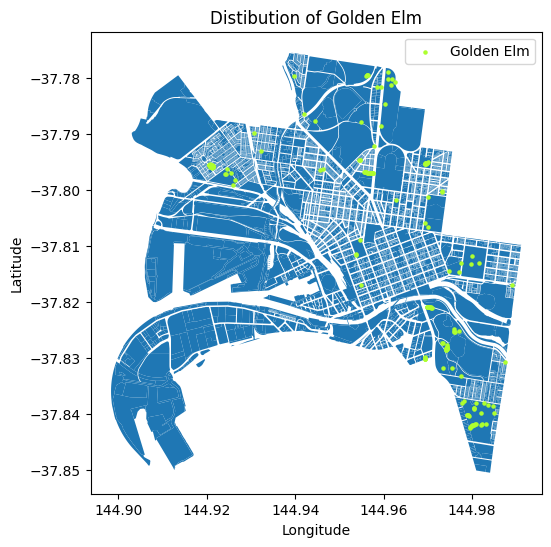

In [15]:
moreton_bay_fig_tdf = tdf[tdf['Common Name'] == 'Golden Elm']
print(moreton_bay_fig_tdf.size)
fig14 = plt.figure(figsize=(10, 6), num=7)
fig14_ax1 = fig14. add_subplot(111)
el_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig14_ax1)
fig14_ax1.scatter(moreton_bay_fig_tdf['Longitude'], moreton_bay_fig_tdf["Latitude"], c='greenyellow', s=5, label='Golden Elm')
fig14_ax1.set_title('Distibution of Golden Elm')
fig14_ax1.set_ylabel('Latitude')
fig14_ax1.set_xlabel('Longitude')
fig14_ax1.legend()
plt.show()

In [16]:
tdf_park.loc[tdf_park["Diameter Breast Height"].idxmax()]

CoM ID                                                         1036933
Common Name                                            Moreton Bay Fig
Scientific Name                                      Ficus macrophylla
Genus                                                            Ficus
Family                                                        Moraceae
Diameter Breast Height                                           347.0
Year Planted                                                      1998
Date Planted                                                10/29/1998
Age Description                                                 Mature
Useful Life Expectency                                     21-30 years
Useful Life Expectency Value                                      30.0
Precinct                                                           NaN
Located in                                                        Park
UploadDate                                                   1/10/2021
Coordi

Here's the fattest tree in a park in melboune!

![](park_tree.png)


Last year a media outlet launched a poll for the top 10 best looking trees in Melbourne and this tree had the honour of coming in at number eight.

14763


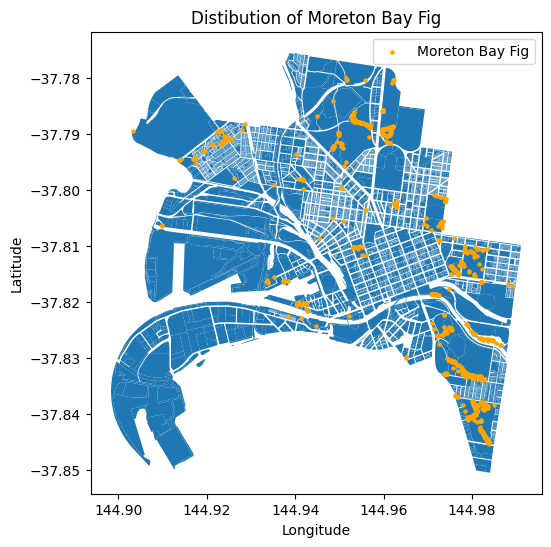

In [17]:
moreton_bay_fig_tdf = tdf[tdf['Common Name'] == 'Moreton Bay Fig']
print(moreton_bay_fig_tdf.size)
fig7 = plt.figure(figsize=(10, 6), num=7)
fig7_ax1 = fig7. add_subplot(111)
el_prop = gpd.read_file("boundaries/property-boundaries/property-boundaries.shp")
if mel_prop.crs != "EPSG:4326":
        mel_prop = mel_prop.to_crs("EPSG:4326")
mel_prop.plot(ax=fig7_ax1)
fig7_ax1.scatter(moreton_bay_fig_tdf['Longitude'], moreton_bay_fig_tdf["Latitude"], c='orange', s=5, label='Moreton Bay Fig')
fig7_ax1.set_title('Distibution of Moreton Bay Fig')
fig7_ax1.set_ylabel('Latitude')
fig7_ax1.set_xlabel('Longitude')
fig7_ax1.legend()
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [Text(0, 0, 'Adoxaceae'),
  Text(1, 0, 'Altingiaceae'),
  Text(2, 0, 'Anacardiaceae'),
  Text(3, 0, 'Apocynaceae'),
  Text(4, 0, 'Aquifoliaceae'),
  Text(5, 0, 'Araliaceae'),
  Text(6, 0, 'Araucariaceae'),
  Text(7, 0, 'Arecaceae'),
  Text(8, 0, 'Asparagaceae'),
  Text(9, 0, 'Atherospermataceae'),
  Text(10, 0, 'Betulaceae'),
  Text(11, 0, 'Bignoniaceae'),
  Text(12, 0, 'Cannabaceae'),
  Text(13, 0, 'Casuarinaceae'),
  Text(14, 0, 'Celastraceae'),
  Text(15, 0, 'Cornaceae'),
  Text(16, 0, 'Corynocarpaceae'),
  Text(17, 0, 'Cunoniaceae'),
  Text(18, 0, 'Cupressaceae'),
  Text(19, 0, 'Elaeocarpaceae'),
  Text(20, 0, 'Ericaceae'),
  Text(21, 0

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

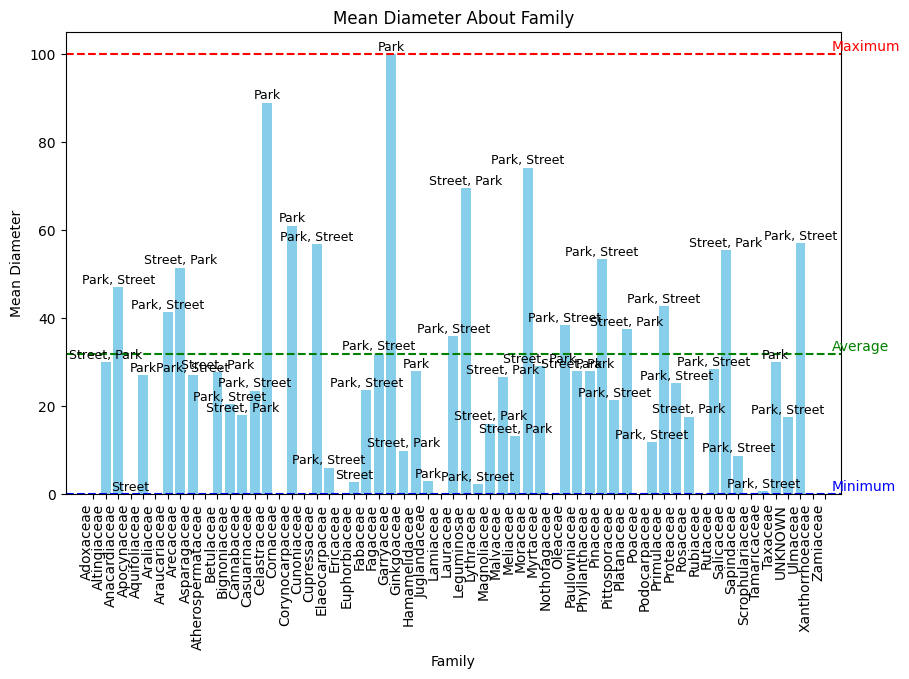

In [18]:
family_mean_diameter = tdf.groupby("Family")["Diameter Breast Height"].mean()
locations = tdf.groupby("Family")["Located in"].apply(lambda x: ', '.join(map(str, x.dropna().unique())))
family = family_mean_diameter.index
mean_diameter = family_mean_diameter.values
fig3 = plt.figure(figsize=(10, 6), num=4)
fig3_ax1 = fig3.add_subplot(111)
bars = fig3_ax1.bar(family, mean_diameter, color="skyblue")
for bar, location in zip(bars, locations):
        y_val = bar.get_height()
        fig3_ax1.text(bar.get_x() + bar.get_width() / 2, y_val + 0.1, location, ha='center', va='bottom', fontsize=9)
global_mean = family_mean_diameter.mean()
global_max = family_mean_diameter.max()
global_min = family_mean_diameter.min()
fig3_ax1.axhline(global_mean, color='green', linewidth=1.5, linestyle='--', label=f'Global Mean: {global_mean:.2f}')
fig3_ax1.axhline(global_max, color='red', linewidth=1.5, linestyle='--', label=f'Global Max: {global_max:.2f}')
fig3_ax1.axhline(global_min, color='blue', linewidth=1.5, linestyle='--', label=f'Global Min: {global_min:.2f}')
fig3_ax1.text(len(family)-0.5, global_mean, 'Average', color='green', va='bottom', fontsize=10, ha='left')
fig3_ax1.text(len(family)-0.5, global_max, 'Maximum', color='red', va='bottom', fontsize=10, ha='left')
fig3_ax1.text(len(family)-0.5, global_min, 'Minimum', color='blue', va='bottom', fontsize=10, ha='left')
fig3_ax1.set_title("Mean Diameter About Family")
fig3_ax1.set_xlabel("Family")
fig3_ax1.set_ylabel("Mean Diameter")
plt.xticks(rotation=90, ha='right')
#Influence of Plant Subjects on Plant Diameter Breast Height (DBH)


/var/folders/w_/h6lh6wr515z2ry3b9mdk_7sr0000gn/T/ipykernel_25126/1436285757.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_diameter_by_bin = tdf.groupby('Latitude_Bin')["Diameter Breast Height"].mean()


Text(0, 0.5, 'Mean Diameter')

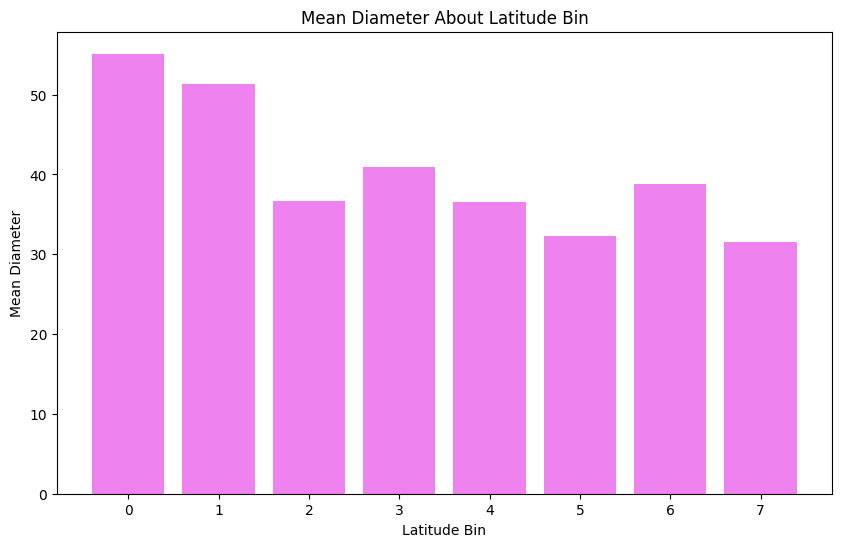

In [19]:
fig4 = plt.figure(figsize=(10, 6), num=5)
fig4_ax1 = fig4.add_subplot(111)
bin_width = 0.01
bins = np.arange(tdf["Latitude"].min(), tdf["Latitude"].max() + bin_width, bin_width)
tdf['Latitude_Bin'] = pd.cut(tdf["Latitude"], bins=bins)
mean_diameter_by_bin = tdf.groupby('Latitude_Bin')["Diameter Breast Height"].mean()
categories = mean_diameter_by_bin.index
values = mean_diameter_by_bin.values
x_labels = [f'{interval.left:.2f} to {interval.right:.2f}' for interval in categories]
x = range(len(categories))
fig4_ax1.bar(x, values, color='violet')
fig4_ax1.set_title("Mean Diameter About Latitude Bin")
fig4_ax1.set_xlabel("Latitude Bin")
fig4_ax1.set_ylabel("Mean Diameter")
#Effect of Latitude on the Size of Diameter Breast Height (DBH) in Plants.

/var/folders/w_/h6lh6wr515z2ry3b9mdk_7sr0000gn/T/ipykernel_25126/3614065956.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_diameter_by_bin = tdf.groupby('Longitude_Bin')["Diameter Breast Height"].mean()


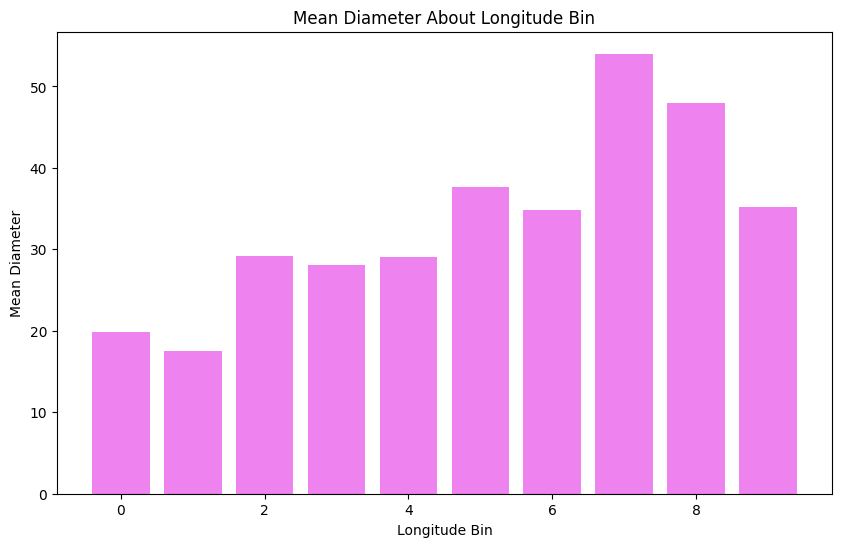

In [20]:
fig5 = plt.figure(figsize=(10, 6), num=6)
fig5_ax1 = fig5.add_subplot(111)
bin_width = 0.01
bins = np.arange(tdf["Longitude"].min(), tdf["Longitude"].max() + bin_width, bin_width)
tdf['Longitude_Bin'] = pd.cut(tdf["Longitude"], bins=bins)
mean_diameter_by_bin = tdf.groupby('Longitude_Bin')["Diameter Breast Height"].mean()
categories = mean_diameter_by_bin.index
values = mean_diameter_by_bin.values
x_labels = [f'{interval.left:.2f} to {interval.right:.2f}' for interval in categories]
x = range(len(categories))
fig5_ax1.bar(x, values, color='violet')
fig5_ax1.set_title("Mean Diameter About Longitude Bin")
fig5_ax1.set_xlabel("Longitude Bin")
fig5_ax1.set_ylabel("Mean Diameter")

plt.show()
#Effect of Longitude on the Size of Diameter Breast Height (DBH) in Plants.

Age Description
Juvenile        7.986708
Mature         69.569205
New             3.590778
Over-mature    87.179054
Semi-Mature    24.900891
Name: Diameter Breast Height, dtype: float64


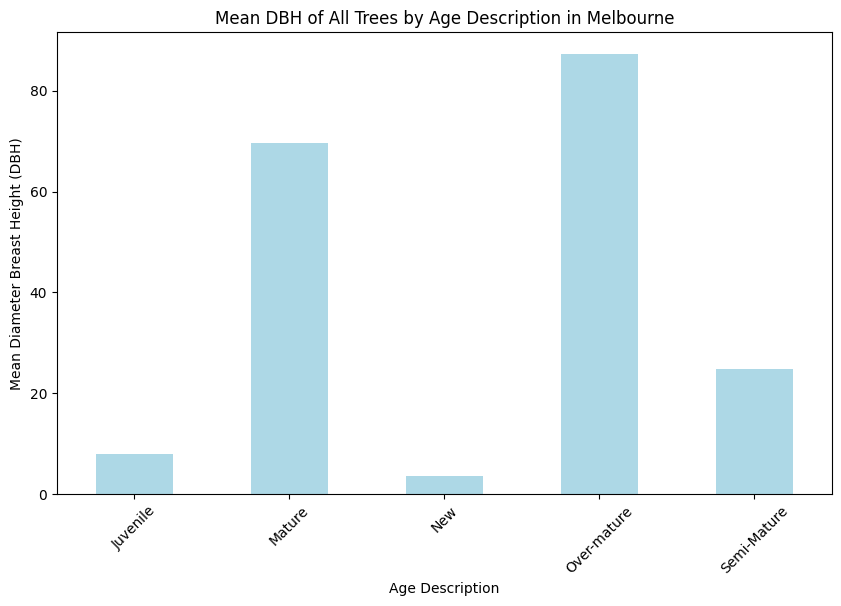

In [21]:
age_desc_mean_diameter = tdf.groupby('Age Description')['Diameter Breast Height'].mean()

print(age_desc_mean_diameter)

plt.figure(figsize=(10, 6))
age_desc_mean_diameter.plot(kind='bar', color='lightblue')
plt.xlabel('Age Description')
plt.ylabel('Mean Diameter Breast Height (DBH)')
plt.title('Mean DBH of All Trees by Age Description in Melbourne')
plt.xticks(rotation=45)
plt.show()


Useful Life Expectency
1-5 years                   56.824000
1-5 years (<50% canopy)     51.027443
1-5 years (>50% canopy)     50.742424
11-20 years                 48.982097
21-30 years                 39.060275
31-60 years                 31.230928
6-10 years (<50% canopy)    45.720774
6-10 years (>50% canopy)    57.190114
61+ years                   11.675842
<1 year                     42.135484
Name: Diameter Breast Height, dtype: float64


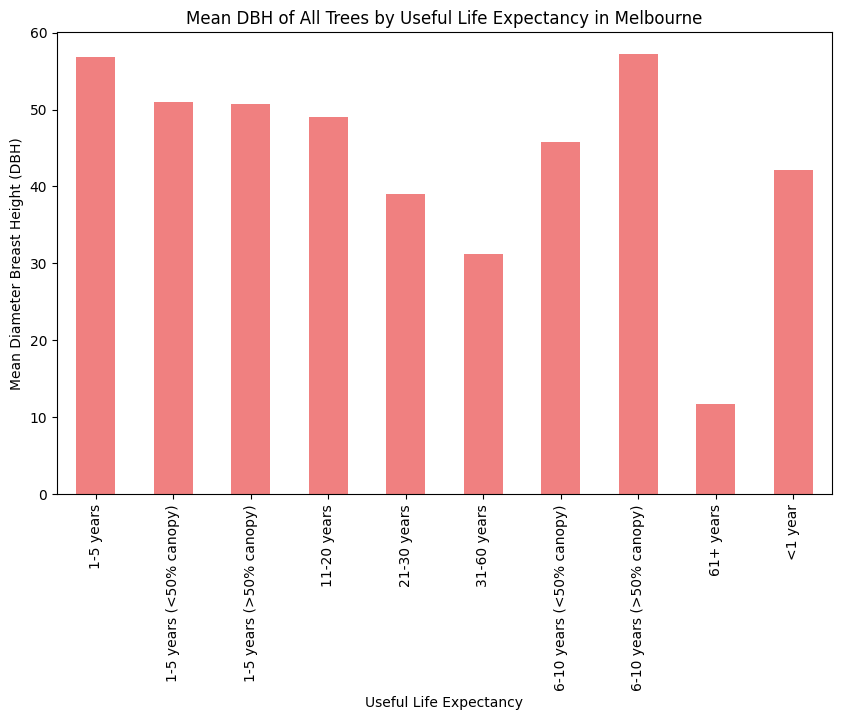

In [22]:
ule_mean_diameter = tdf.groupby('Useful Life Expectency')['Diameter Breast Height'].mean()
print(ule_mean_diameter)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ule_mean_diameter.plot(kind='bar', color='lightcoral')
plt.xlabel('Useful Life Expectancy')
plt.ylabel('Mean Diameter Breast Height (DBH)')
plt.title('Mean DBH of All Trees by Useful Life Expectancy in Melbourne')
plt.xticks(rotation=90)
plt.show()


Useful Life Expectency Value
1.0     42.135484
5.0     51.350949
10.0    52.352387
20.0    48.982097
30.0    39.060275
60.0    31.230928
80.0    11.675842
Name: Diameter Breast Height, dtype: float64


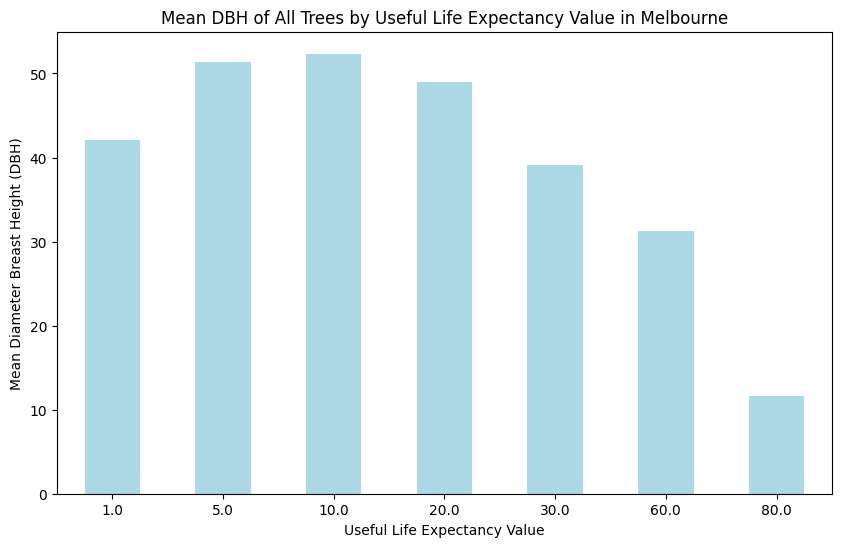

In [23]:
ule_value_mean_diameter = tdf.groupby('Useful Life Expectency Value')['Diameter Breast Height'].mean()
print(ule_value_mean_diameter)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
ule_value_mean_diameter.plot(kind='bar', color='lightblue')
plt.xlabel('Useful Life Expectancy Value')
plt.ylabel('Mean Diameter Breast Height (DBH)')
plt.title('Mean DBH of All Trees by Useful Life Expectancy Value in Melbourne')
plt.xticks(rotation=0)
plt.show()
